In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# 1. XML Data Parser

In [2]:
import xml.etree.ElementTree as ET

In [3]:
path = '/home/yulu/FreeTailHack/data/apple_health_export/'
file1 = 'export.xml'
file2 = 'export_cda.xml'


In [13]:
def listTypes(root):
    types = []
    for r in root.findall('Record'):
        date = r.attrib['startDate'][:10]
        if date == '2018-03-31':
            type = r.attrib['type']
            types.append(type)
    return(np.unique(types))

In [5]:
def loadTypeData(root, keyType):
    startTime = []
    endTime = []
    units = []
    values = []
    global factors
    for r in root.findall('Record'):
        startDate = r.attrib['startDate']
        endDate = r.attrib['endDate']
        date = startDate[:10]
        if date == '2018-03-31' and r.attrib['type'] == factors[keyType]:
            unit = r.attrib['unit']
            value = r.attrib['value']
            startTime.append(startDate)
            endTime.append(endDate)
            values.append(value)
            units.append(unit)
    labels = ['StartTime', 'EndTime', keyType, 'units']
    tempData = pd.DataFrame(dict(zip(labels, [startTime, endTime, values, units])))
    data = tempData.copy()
    data.iloc[:,0] = tempData.StartTime.astype(str).str[:-6] #strip out time zone 
    data.iloc[:,1] = tempData.EndTime.astype(str).str[:-6]
    #df['datetime'] = df['datetime'].astype(str).str[:-6]
    data.iloc[:,2] = tempData[keyType]
    data.iloc[:,3] = tempData['units']
    data.columns = labels
    return data
        

In [6]:
def loadWorkOut(root):
    startTimes = []
    endTimes = []
    duration = []
    durationUnit = []
    activityType = []
    for r in root.findall('Workout'):
        startTime = r.attrib['startDate']
        endTime = r.attrib['endDate']
        if startTime[:10] == '2018-03-31':
            duration.append(r.attrib['duration'])
            durationUnit.append(r.attrib['durationUnit'])
            acttype = r.attrib['workoutActivityType'][21:]
            # Correct wrong logging
            if acttype == 'StairClimbing':
                acttype = 'Elliptical'
            elif acttype == 'Yoga':
                acttype = 'TraditionalStrengthTraining'
            elif acttype == 'Bowling':
                acttype ='Walking'
            activityType.append(acttype)
            startTimes.append(startTime)
            endTimes.append(endTime)
    labels = ['StartTime', 'EndTime', 'Duration', 'ActivityType']
    data = pd.DataFrame(dict(list(zip(labels, [startTimes, endTimes, duration, activityType]))))
    data.StartTime = data.StartTime.astype(str).str[:-6]
    data.EndTime = data.EndTime.astype(str).str[:-6]
    return data

# 2. export

## 2.1 All three people data

In [7]:
path = '/home/yulu/FreeTailHack/'
subpath = ['Juan_data', 'Tori_data', 'Carlos_data']
filename = 'export.xml'

In [8]:
factors = {
    'ActiveEnergyBurned':'HKQuantityTypeIdentifierActiveEnergyBurned' ,
    'BasalEnergyBurned': 'HKQuantityTypeIdentifierBasalEnergyBurned',
    'DistanceWalkingRunning': 'HKQuantityTypeIdentifierDistanceWalkingRunning',
    'HeartRate':'HKQuantityTypeIdentifierHeartRate', # sub yes 
    'StepCount': 'HKQuantityTypeIdentifierStepCount',
    
}

In [17]:
listTypes(root)

array(['HKCategoryTypeIdentifierAppleStandHour',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierHeartRateVariabilitySDNN',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage'], dtype='<U48')

In [ ]:
for sp in subpath:
    file = path + sp + '/' + filename
    tree = ET.parse(file)
    root = tree.getroot()
    savepath = './' + sp + '/'
    loadTypeData(root, 'BasalEnergyBurned').to_csv(savepath + 'BasalEnergyBurned.csv', index = False)
    loadTypeData(root, 'ActiveEnergyBurned').to_csv(savepath + 'ActiveEnergyBurned.csv', index = False)
    loadTypeData(root, 'DistanceWalkingRunning').to_csv(savepath + 'DistanceWalkingRunning.csv', index = False)
    loadTypeData(root, 'HeartRate').to_csv(savepath + 'HeartRate.csv', index = False)
    loadTypeData(root, 'StepCount').to_csv(savepath + 'StepCount.csv', index = False)
    loadWorkOut(root,).to_csv(savepath + 'WorkOutCategory.csv', index = False)
    

## 2.2 Single Juan data

In [10]:
tree = ET.parse(path + subpath[0] + '/' + filename)
root = tree.getroot()
#listTypes(root)

In [11]:
loadTypeData(root, 'BasalEnergyBurned').to_csv('BasalEnergyBurned.csv', index = False)
loadTypeData(root, 'ActiveEnergyBurned').to_csv('ActiveEnergyBurned.csv', index = False)
loadTypeData(root, 'DistanceWalkingRunning').to_csv('DistanceWalkingRunning.csv', index = False)
loadTypeData(root, 'HeartRate').to_csv('HeartRate.csv', index = False)
loadTypeData(root, 'StepCount').to_csv('StepCount.csv', index = False)
loadWorkOut(root,).to_csv('WorkOutCategory.csv', index = False)


# 3. Analysis

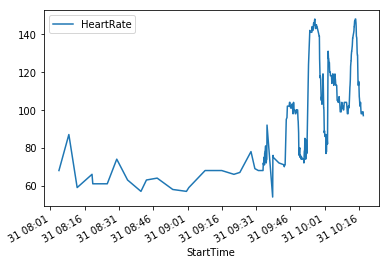

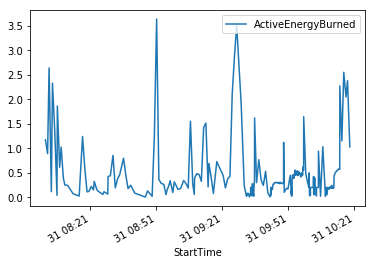

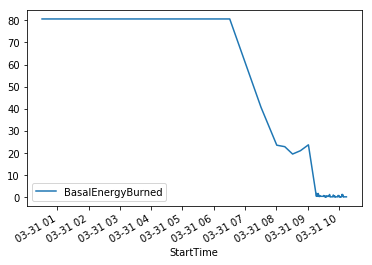

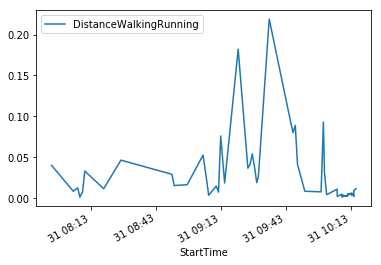

In [12]:
hr = pd.read_csv('HeartRate.csv', parse_dates=True)
hr.StartTime = pd.to_datetime(hr.StartTime)
hr.EndTime = pd.to_datetime(hr.EndTime)
hr.plot(y = 'HeartRate', x = 'StartTime')

aeb = pd.read_csv('ActiveEnergyBurned.csv')
aeb.StartTime = pd.to_datetime(aeb.StartTime)
aeb.EndTime = pd.to_datetime(aeb.EndTime)
aeb.plot(y = 'ActiveEnergyBurned', x = 'StartTime')

beb = pd.read_csv('BasalEnergyBurned.csv', parse_dates = True)
beb.StartTime = pd.to_datetime(beb.StartTime)
beb.EndTime= pd.to_datetime(beb.EndTime)
beb.plot(y = 'BasalEnergyBurned', x = 'StartTime')


dwr = pd.read_csv('DistanceWalkingRunning.csv', parse_dates = True)
dwr.StartTime = pd.to_datetime(dwr.StartTime)
dwr.EndTime= pd.to_datetime(dwr.EndTime)
dwr.plot(y = 'DistanceWalkingRunning', x = 'StartTime')

plt.show()